In [158]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    res = 1/(1+np.exp(-x))
    return res

def losss(v,target):
    return 0.5*((v-target)**2)
   
all_training_data = [
                ["and",[0,0,0],[0,1,0],[1,0,0],[1,1,1]],
                ["or",[0,0,0],[0,1,1],[1,0,1],[1,1,1]],
                ["xor",[0,0,0],[0,1,0],[1,0,0],[1,1,1]]
                ]

all_testing_data = [
                ["and",[0,0,0],[0,1,0],[1,0,0],[1,1,1]],
                ["or",[0,0,0],[0,1,1],[1,0,1],[1,1,1]],
                ["xor",[0,0,0],[0,1,0],[1,0,0],[1,1,1]]
                ]

def training(logic_gate,epochs,learning_rate,t_d = all_training_data):
    training_data = t_d[[row[0] for row in t_d].index(logic_gate)][1:]
    w = np.random.normal(0,0.2,13)
    losses = []
    ww = []
    for i in range(epochs):
        shuffled_training_data = np.copy(training_data)
        np.random.shuffle(shuffled_training_data)
        for i in range(len(shuffled_training_data)):
    #-------FORWARD-PROPAGATION
            target = shuffled_training_data[i][2]
    #       --------
            u1 = shuffled_training_data[i][0]
            u2 = shuffled_training_data[i][1]
            u_bias = 1
    #       --------
            h1 = sigmoid((u1*w[0])+(u2*w[1])+(u_bias*w[2]))
            h2 = sigmoid((u1*w[3])+(u2*w[4])+(u_bias*w[5]))
            h3 = sigmoid((u1*w[6])+(u2*w[7])+(u_bias*w[8]))
            h_bias = 1
    #       --------
            v = sigmoid((h1*w[9])+(h2*w[10])+(h3*w[11])+(h_bias*w[12]))
    #       --------
    #       CALCULATE LOSS
            loss = losss(v,target)
    #-------BACK-PROPAGATION
            w[12] -= learning_rate * (v-target) * h_bias * v * (1-v)
            w[11] -= learning_rate * (v-target) * h3     * v * (1-v)
            w[10] -= learning_rate * (v-target) * h2     * v * (1-v)
            w[9]  -= learning_rate * (v-target) * h1     * v * (1-v)
    # #       --------         
            w[8] -= learning_rate * (v-target) * v * (1-v) * w[11] * u_bias  * h3 * (1-h3)
            w[7] -= learning_rate * (v-target) * v * (1-v) * w[11] * u2      * h3 * (1-h3)
            w[6] -= learning_rate * (v-target) * v * (1-v) * w[11] * u1      * h3 * (1-h3)
            w[5] -= learning_rate * (v-target) * v * (1-v) * w[10] * u_bias  * h2 * (1-h2)
            w[4] -= learning_rate * (v-target) * v * (1-v) * w[10] * u2      * h2 * (1-h2)
            w[3] -= learning_rate * (v-target) * v * (1-v) * w[10] * u1      * h2 * (1-h2)
            w[2] -= learning_rate * (v-target) * v * (1-v) * w[9]  * u_bias  * h1 * (1-h1)
            w[1] -= learning_rate * (v-target) * v * (1-v) * w[9]  * u2      * h1 * (1-h1)
            w[0] -= learning_rate * (v-target) * v * (1-v) * w[9]  * u1      * h1 * (1-h1) 
        losses.append(loss)
        wcopy = np.copy(w)
        ww.append(wcopy)
        
    return w,ww,losses

def testing(logic_gate,w,t_d = all_testing_data):
    testing_data = t_d[[row[0] for row in t_d].index(logic_gate)][1:]
    correct = 0
    ww = []
    for i in range(len(testing_data)):
        target = testing_data[i][2]
#       --------
        u1 = testing_data[i][0]
        u2 = testing_data[i][1]
        u_bias = 1
#       --------
        h1 = sigmoid((u1*w[0])+(u2*w[1])+(u_bias*w[2]))
        h2 = sigmoid((u1*w[3])+(u2*w[4])+(u_bias*w[5]))
        h3 = sigmoid((u1*w[6])+(u2*w[7])+(u_bias*w[8]))
        h_bias = 1
#       --------
        v = sigmoid((h1*w[9])+(h2*w[10])+(h3*w[11])+(h_bias*w[12]))
        print(target)
        print(v)
        print(" ")
        if (v>0.5):
            vv = 1
        elif (v<0.5):
            vv = 0
        else:
            v==0.5
#       --------
        if (vv==target):
            correct += 1
    accuracy = round(correct/len(testing_data),2)
    return accuracy

epochs = 5000
learning_rate = 1
w,ww,losses = training("and",epochs,learning_rate)

av_every = 50
losses_av = []

for i in range(0,len(losses),av_every):
    losses_av.append(np.average(losses[i:i+av_every]))
                   
accuracy = testing("and",w)
print(accuracy)

0
0.00020432507307983365
 
0
0.009365872832933504
 
0
0.009234328857135148
 
1
0.9850067897928991
 
1.0


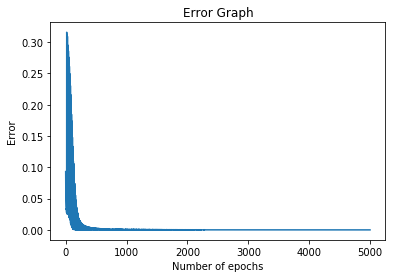

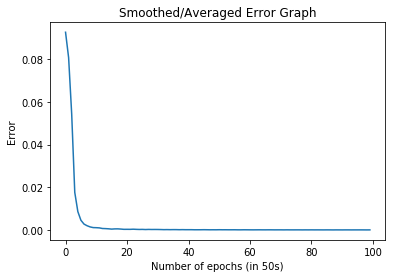

In [159]:
plt.plot(losses)

plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Error Graph')
plt.show()

plt.plot(losses_av)

plt.xlabel('Number of epochs (in 50s)')
plt.ylabel('Error')
plt.title('Smoothed/Averaged Error Graph')
plt.show()

In [160]:
w_0 = []
w_1 = []
w_2 = []
w_3 = []
w_4 =[]
w_5 =[]
w_6 =[]
w_7 =[]
w_8 =[]
w_9 =[]
w_10 =[]
w_11 =[]
w_12 =[]

for i in range(len(ww)):
    w_0.append(ww[i][0])
    w_1.append(ww[i][1])
    w_2.append(ww[i][2])
    w_3.append(ww[i][3])
    w_4.append(ww[i][4])
    w_5.append(ww[i][5])
    w_6.append(ww[i][6])
    w_7.append(ww[i][7])
    w_8.append(ww[i][8])
    w_9.append(ww[i][9])
    w_10.append(ww[i][10])
    w_11.append(ww[i][11])
    w_12.append(ww[i][12])
    
print(len(w_4))

print(max(w_4))
print(min(w_4))


5000
1.1392666869450996
-0.06224479391233916


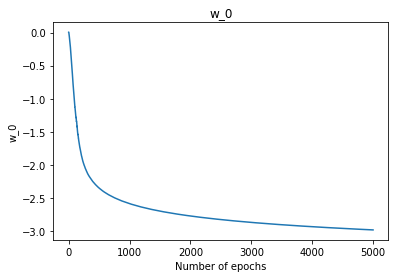

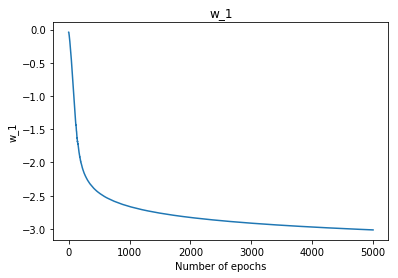

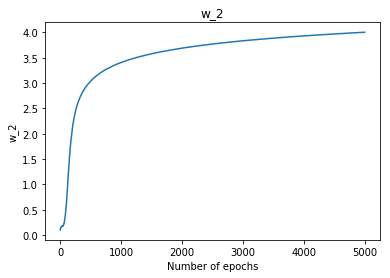

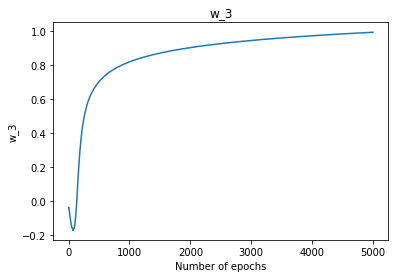

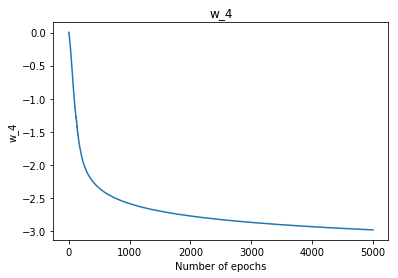

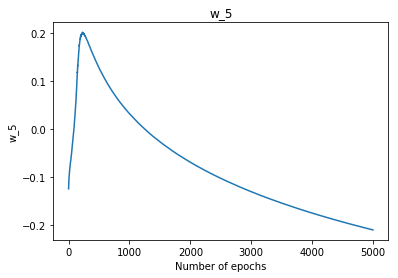

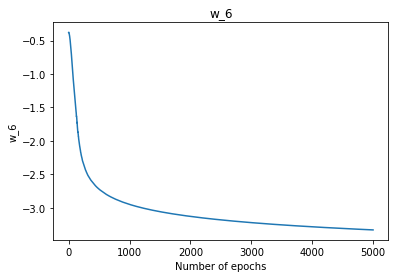

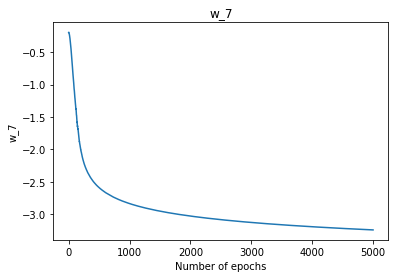

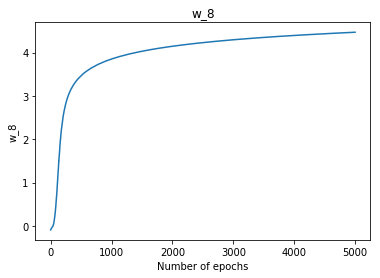

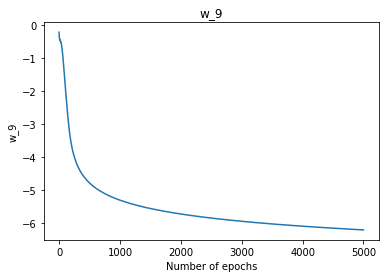

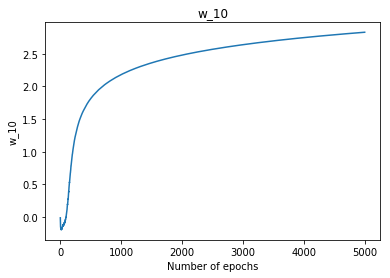

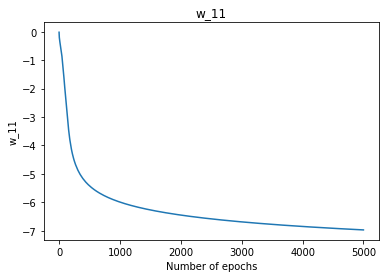

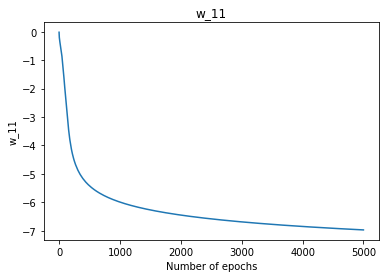

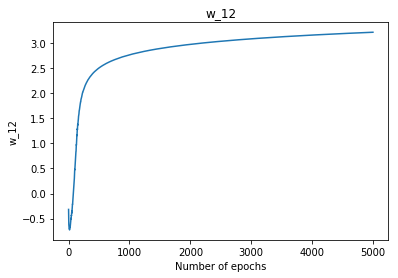

In [161]:
plt.plot(w_0)

plt.xlabel('Number of epochs')
plt.ylabel('w_0')
plt.title('w_0')
plt.show()

plt.plot(w_1)

plt.xlabel('Number of epochs')
plt.ylabel('w_1')
plt.title('w_1')
plt.show()

plt.plot(w_2)

plt.xlabel('Number of epochs')
plt.ylabel('w_2')
plt.title('w_2')
plt.show()

plt.plot(w_3)

plt.xlabel('Number of epochs')
plt.ylabel('w_3')
plt.title('w_3')
plt.show()

plt.plot(w_0)

plt.xlabel('Number of epochs')
plt.ylabel('w_4')
plt.title('w_4')
plt.show()

plt.plot(w_5)

plt.xlabel('Number of epochs')
plt.ylabel('w_5')
plt.title('w_5')
plt.show()

plt.plot(w_6)

plt.xlabel('Number of epochs')
plt.ylabel('w_6')
plt.title('w_6')
plt.show()

plt.plot(w_7)

plt.xlabel('Number of epochs')
plt.ylabel('w_7')
plt.title('w_7')
plt.show()

plt.plot(w_8)

plt.xlabel('Number of epochs')
plt.ylabel('w_8')
plt.title('w_8')
plt.show()

plt.plot(w_9)

plt.xlabel('Number of epochs')
plt.ylabel('w_9')
plt.title('w_9')
plt.show()

plt.plot(w_10)

plt.xlabel('Number of epochs')
plt.ylabel('w_10')
plt.title('w_10')
plt.show()

plt.plot(w_11)

plt.xlabel('Number of epochs')
plt.ylabel('w_11')
plt.title('w_11')
plt.show()

plt.plot(w_11)

plt.xlabel('Number of epochs')
plt.ylabel('w_11')
plt.title('w_11')
plt.show()

plt.plot(w_12)

plt.xlabel('Number of epochs')
plt.ylabel('w_12')
plt.title('w_12')
plt.show()
